<a href="https://colab.research.google.com/github/hoon0gim/ganproject/blob/main/project03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout
from tensorflow.keras.layers import BatchNormalization, Activation, LeakyReLU, UpSampling2D, Conv2D
from tensorflow.keras.models import Sequential, Model
import numpy as np
import matplotlib.pyplot as plt
import glob
from glob import glob
import cv2
import os
import random
print(os.getcwd())


/content


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
data_list = glob('/content/drive/MyDrive/dataset (1)/id dataset/*.jpg')

print(data_list[:])

['/content/drive/MyDrive/dataset (1)/id dataset/id (982).jpg', '/content/drive/MyDrive/dataset (1)/id dataset/id (981).jpg', '/content/drive/MyDrive/dataset (1)/id dataset/id (980).jpg', '/content/drive/MyDrive/dataset (1)/id dataset/id (979).jpg', '/content/drive/MyDrive/dataset (1)/id dataset/id (978).jpg', '/content/drive/MyDrive/dataset (1)/id dataset/id (977).jpg', '/content/drive/MyDrive/dataset (1)/id dataset/id (976).jpg', '/content/drive/MyDrive/dataset (1)/id dataset/id (975).jpg', '/content/drive/MyDrive/dataset (1)/id dataset/id (974).jpg', '/content/drive/MyDrive/dataset (1)/id dataset/id (973).jpg', '/content/drive/MyDrive/dataset (1)/id dataset/id (972).jpg', '/content/drive/MyDrive/dataset (1)/id dataset/id (971).jpg', '/content/drive/MyDrive/dataset (1)/id dataset/id (970).jpg', '/content/drive/MyDrive/dataset (1)/id dataset/id (969).jpg', '/content/drive/MyDrive/dataset (1)/id dataset/id (968).jpg', '/content/drive/MyDrive/dataset (1)/id dataset/id (967).jpg', '/conte

In [27]:
data_height = 256
data_width = 256
batch_size = len(data_list)

In [50]:
def make_file(data_height, data_width, batch_size):
    images = np.zeros((batch_size, data_height, data_width,3))
    for n, path in enumerate(data_list[:batch_size]):
        
    # image transform
        image = cv2.imread(data_list[n], 1)
        image = cv2.resize(image, (data_height, data_width), interpolation=cv2.INTER_LINEAR)/255
        images[n, :, :] =image
        
    return images

In [51]:
X_train = make_file(data_height, data_width, batch_size)

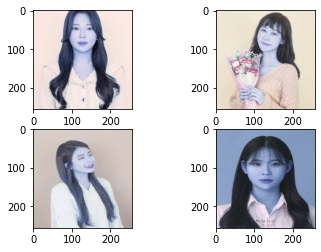

In [61]:
fig, axs = plt.subplots(2, 2)

axs[0, 0].imshow(X_train[random.randrange(0,batch_size)][:, :, :], cmap='gray')
axs[0, 1].imshow(X_train[random.randrange(0,batch_size)][:, :, :], cmap='gray')
axs[1, 0].imshow(X_train[random.randrange(0,batch_size)][:, :, :], cmap='gray')
axs[1, 1].imshow(X_train[random.randrange(0,batch_size)][:, :], cmap='gray')

plt.show()

In [62]:
X_train.shape

(1236, 256, 256, 3)

In [63]:
generator = Sequential()
generator.add(Dense(128*64*64, input_dim=100, activation=LeakyReLU(0.2)))
generator.add(BatchNormalization())
generator.add(Reshape((64,64,128)))
generator.add(UpSampling2D())
generator.add(Conv2D(64, kernel_size=5, padding='same'))
generator.add(BatchNormalization())
generator.add(Activation(LeakyReLU(0.2)))
generator.add(UpSampling2D())
generator.add(Conv2D(3, kernel_size=5, padding='same', activation='tanh'))

In [66]:
discriminator = Sequential()
discriminator.add(Conv2D(64, kernel_size=5, strides=2, input_shape=(256,256,3), padding="same"))
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(0.3))
discriminator.add(Conv2D(128, kernel_size=5, strides=2, padding="same"))
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(0.3))
discriminator.add(Flatten())
discriminator.add(Dense(1, activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy', optimizer='adam')
discriminator.trainable=False

In [67]:
ginput = Input(shape=(100,))

dis_output = discriminator(generator(ginput))
gan = Model(ginput, dis_output)
gan.compile(loss='binary_crossentropy', optimizer='adam')
gan.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 100)]             0         
                                                                 
 sequential (Sequential)     (None, 256, 256, 3)       55260163  
                                                                 
 sequential_2 (Sequential)   (None, 1)                 734081    
                                                                 
Total params: 55,994,244
Trainable params: 54,211,459
Non-trainable params: 1,782,785
_________________________________________________________________


(25, 256, 256, 3)


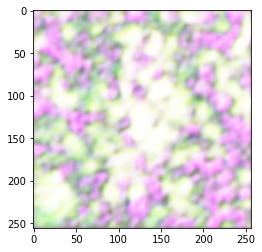

In [90]:
img = np.random.normal(0,1,(25,100))
imgs = generator.predict(img)
imgs = 0.5 * imgs + 0.5


print(imgs.shape)
plt.imshow(imgs[0, :, :, :], cmap='gray')

epoch:0 d_loss:9.1016 g_loss:0.0000


<Figure size 720x576 with 0 Axes>

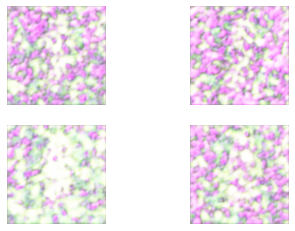

epoch:1 d_loss:1.4202 g_loss:11.0960
epoch:2 d_loss:0.6278 g_loss:34.7998
epoch:3 d_loss:5.6635 g_loss:17.7671
epoch:4 d_loss:2.4032 g_loss:0.0000
epoch:5 d_loss:3.2780 g_loss:0.0000
epoch:6 d_loss:1.4964 g_loss:0.0011
epoch:7 d_loss:0.0626 g_loss:9.7803
epoch:8 d_loss:0.9039 g_loss:7.9287
epoch:9 d_loss:0.6109 g_loss:0.8494
epoch:10 d_loss:0.1655 g_loss:0.0540
epoch:11 d_loss:0.2058 g_loss:0.0348
epoch:12 d_loss:0.2194 g_loss:0.3239
epoch:13 d_loss:0.0547 g_loss:2.6887
epoch:14 d_loss:0.1280 g_loss:4.9137
epoch:15 d_loss:0.1256 g_loss:5.4290
epoch:16 d_loss:0.1765 g_loss:4.0817
epoch:17 d_loss:0.1075 g_loss:2.5481
epoch:18 d_loss:0.0472 g_loss:1.4696
epoch:19 d_loss:0.0856 g_loss:1.3329
epoch:20 d_loss:0.0707 g_loss:2.2940
epoch:21 d_loss:0.0229 g_loss:3.6755
epoch:22 d_loss:0.0346 g_loss:4.6971
epoch:23 d_loss:0.0446 g_loss:4.9463
epoch:24 d_loss:0.0587 g_loss:4.2099
epoch:25 d_loss:0.0335 g_loss:3.1577
epoch:26 d_loss:0.0247 g_loss:2.5366
epoch:27 d_loss:0.0240 g_loss:2.5414
epoch:2

<Figure size 720x576 with 0 Axes>

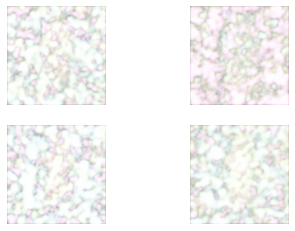

epoch:51 d_loss:0.0122 g_loss:5.3109
epoch:52 d_loss:0.0217 g_loss:4.5547
epoch:53 d_loss:0.0130 g_loss:4.0595
epoch:54 d_loss:0.0158 g_loss:3.9380
epoch:55 d_loss:0.0227 g_loss:4.1337
epoch:56 d_loss:0.0129 g_loss:4.7899
epoch:57 d_loss:0.0103 g_loss:5.3975
epoch:58 d_loss:0.0182 g_loss:5.5275
epoch:59 d_loss:0.0153 g_loss:5.0925
epoch:60 d_loss:0.0125 g_loss:4.7274
epoch:61 d_loss:0.0116 g_loss:4.4375
epoch:62 d_loss:0.0108 g_loss:4.4106
epoch:63 d_loss:0.0108 g_loss:4.7145
epoch:64 d_loss:0.0048 g_loss:5.2719
epoch:65 d_loss:0.0026 g_loss:5.9849
epoch:66 d_loss:0.0057 g_loss:6.3003
epoch:67 d_loss:0.0136 g_loss:6.1969
epoch:68 d_loss:0.0075 g_loss:5.9462
epoch:69 d_loss:0.0104 g_loss:5.6175
epoch:70 d_loss:0.0137 g_loss:5.2264
epoch:71 d_loss:0.0292 g_loss:4.6460
epoch:72 d_loss:0.0265 g_loss:4.2206
epoch:73 d_loss:0.0210 g_loss:4.8331
epoch:74 d_loss:0.0055 g_loss:5.9180
epoch:75 d_loss:0.0058 g_loss:7.0347
epoch:76 d_loss:0.0233 g_loss:6.8896
epoch:77 d_loss:0.0419 g_loss:6.4324
e

<Figure size 720x576 with 0 Axes>

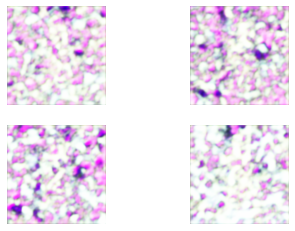

epoch:101 d_loss:0.0467 g_loss:0.3553
epoch:102 d_loss:0.0938 g_loss:0.3362
epoch:103 d_loss:0.0148 g_loss:0.7996
epoch:104 d_loss:0.0412 g_loss:0.7370
epoch:105 d_loss:0.0569 g_loss:1.3966
epoch:106 d_loss:0.0136 g_loss:2.6559
epoch:107 d_loss:0.0720 g_loss:1.2857
epoch:108 d_loss:0.0690 g_loss:1.4263
epoch:109 d_loss:0.1681 g_loss:3.3079
epoch:110 d_loss:0.0589 g_loss:7.6131
epoch:111 d_loss:0.1388 g_loss:6.0920
epoch:112 d_loss:0.1087 g_loss:8.2287
epoch:113 d_loss:0.0628 g_loss:13.9171
epoch:114 d_loss:0.2466 g_loss:12.3656
epoch:115 d_loss:0.1418 g_loss:12.9863
epoch:116 d_loss:0.0332 g_loss:16.4070
epoch:117 d_loss:0.1206 g_loss:15.1618
epoch:118 d_loss:0.0598 g_loss:14.0698
epoch:119 d_loss:0.0332 g_loss:13.0935
epoch:120 d_loss:0.0614 g_loss:12.9116
epoch:121 d_loss:0.1566 g_loss:12.8493
epoch:122 d_loss:0.0043 g_loss:14.6872
epoch:123 d_loss:0.0255 g_loss:14.1455
epoch:124 d_loss:0.0640 g_loss:12.2107
epoch:125 d_loss:0.0875 g_loss:10.9258
epoch:126 d_loss:0.0014 g_loss:10.403

<Figure size 720x576 with 0 Axes>

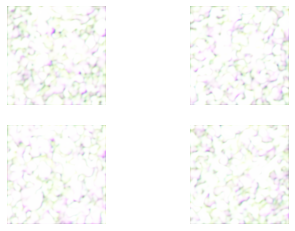

epoch:151 d_loss:5.0292 g_loss:27.0827
epoch:152 d_loss:0.7307 g_loss:31.0183
epoch:153 d_loss:0.4988 g_loss:64.5900
epoch:154 d_loss:2.3667 g_loss:32.2788
epoch:155 d_loss:0.3053 g_loss:5.4123
epoch:156 d_loss:0.7566 g_loss:25.1297
epoch:157 d_loss:0.4520 g_loss:76.5477
epoch:158 d_loss:3.0376 g_loss:79.2575
epoch:159 d_loss:3.1727 g_loss:46.7203
epoch:160 d_loss:0.2516 g_loss:18.3241
epoch:161 d_loss:0.0000 g_loss:0.4947
epoch:162 d_loss:2.0072 g_loss:31.5698
epoch:163 d_loss:0.0883 g_loss:129.8870
epoch:164 d_loss:6.0808 g_loss:77.0548
epoch:165 d_loss:0.9686 g_loss:43.1468
epoch:166 d_loss:0.2042 g_loss:20.6624
epoch:167 d_loss:0.0761 g_loss:1.9307
epoch:168 d_loss:3.4291 g_loss:55.9975
epoch:169 d_loss:1.7148 g_loss:112.7861
epoch:170 d_loss:5.3197 g_loss:74.7870
epoch:171 d_loss:1.5205 g_loss:0.0008
epoch:172 d_loss:21.1996 g_loss:82.3015
epoch:173 d_loss:1.2514 g_loss:266.9720
epoch:174 d_loss:27.4234 g_loss:144.1858
epoch:175 d_loss:5.3015 g_loss:0.0000
epoch:176 d_loss:160.498

<Figure size 720x576 with 0 Axes>

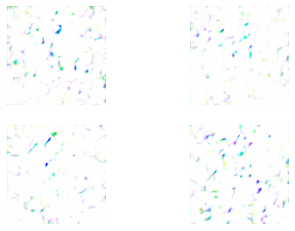

epoch:201 d_loss:0.3731 g_loss:362.5590
epoch:202 d_loss:37.5720 g_loss:355.2638
epoch:203 d_loss:28.3400 g_loss:157.4847
epoch:204 d_loss:3.3481 g_loss:0.0106
epoch:205 d_loss:30.9128 g_loss:20.5188
epoch:206 d_loss:0.2110 g_loss:167.1901
epoch:207 d_loss:5.1376 g_loss:233.2318
epoch:208 d_loss:14.5529 g_loss:195.9521
epoch:209 d_loss:5.3158 g_loss:122.9322
epoch:210 d_loss:4.0377 g_loss:19.6325
epoch:211 d_loss:11.5134 g_loss:67.9912
epoch:212 d_loss:0.9614 g_loss:196.6694
epoch:213 d_loss:5.0205 g_loss:236.4311
epoch:214 d_loss:10.2435 g_loss:211.5453
epoch:215 d_loss:5.1593 g_loss:149.1380
epoch:216 d_loss:2.9608 g_loss:79.8289
epoch:217 d_loss:0.7014 g_loss:23.8474
epoch:218 d_loss:0.9191 g_loss:3.7087
epoch:219 d_loss:1.9571 g_loss:10.2757
epoch:220 d_loss:0.0000 g_loss:33.8094
epoch:221 d_loss:0.1605 g_loss:60.7256
epoch:222 d_loss:0.3716 g_loss:77.9331
epoch:223 d_loss:0.3654 g_loss:84.0688
epoch:224 d_loss:1.1771 g_loss:83.2123
epoch:225 d_loss:0.2221 g_loss:74.4578
epoch:226 

<Figure size 720x576 with 0 Axes>

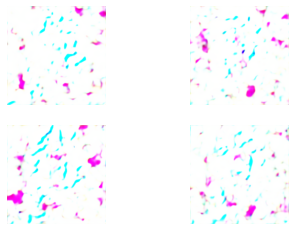

epoch:251 d_loss:0.0157 g_loss:38.5001
epoch:252 d_loss:0.6835 g_loss:39.1212
epoch:253 d_loss:0.1898 g_loss:35.0185
epoch:254 d_loss:0.6073 g_loss:27.0378
epoch:255 d_loss:0.2171 g_loss:20.2845
epoch:256 d_loss:0.4499 g_loss:24.0984
epoch:257 d_loss:0.0077 g_loss:37.7846
epoch:258 d_loss:0.0763 g_loss:44.1014
epoch:259 d_loss:1.4701 g_loss:48.5980
epoch:260 d_loss:8.3026 g_loss:123.4715
epoch:261 d_loss:5.0371 g_loss:211.2056
epoch:262 d_loss:7.1720 g_loss:207.5493
epoch:263 d_loss:8.1747 g_loss:149.6905
epoch:264 d_loss:1.8332 g_loss:106.3675
epoch:265 d_loss:1.8687 g_loss:92.2502
epoch:266 d_loss:2.0571 g_loss:99.0328
epoch:267 d_loss:0.9239 g_loss:97.9263
epoch:268 d_loss:1.1468 g_loss:95.1070
epoch:269 d_loss:0.8094 g_loss:78.9167
epoch:270 d_loss:0.7433 g_loss:108.2602
epoch:271 d_loss:0.0471 g_loss:150.0778
epoch:272 d_loss:0.4051 g_loss:158.6753
epoch:273 d_loss:0.6757 g_loss:137.9468
epoch:274 d_loss:1.1986 g_loss:88.2239
epoch:275 d_loss:0.1731 g_loss:38.9850
epoch:276 d_loss

<Figure size 720x576 with 0 Axes>

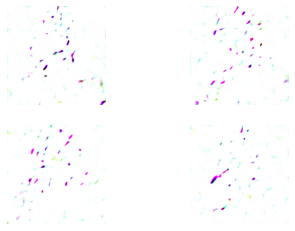

epoch:301 d_loss:1.0269 g_loss:88.1308
epoch:302 d_loss:1.1465 g_loss:92.0201
epoch:303 d_loss:2.5911 g_loss:86.5305
epoch:304 d_loss:1.4105 g_loss:75.4655
epoch:305 d_loss:0.8270 g_loss:59.1900
epoch:306 d_loss:0.3480 g_loss:40.5466
epoch:307 d_loss:0.3463 g_loss:16.6830
epoch:308 d_loss:1.4252 g_loss:59.1291
epoch:309 d_loss:0.9844 g_loss:105.4246
epoch:310 d_loss:1.3292 g_loss:128.2553
epoch:311 d_loss:2.6854 g_loss:133.5726
epoch:312 d_loss:2.0797 g_loss:123.1167
epoch:313 d_loss:1.4775 g_loss:105.6106
epoch:314 d_loss:0.9362 g_loss:83.6766
epoch:315 d_loss:0.7755 g_loss:62.5115
epoch:316 d_loss:0.2381 g_loss:42.5274
epoch:317 d_loss:0.4932 g_loss:25.5316
epoch:318 d_loss:0.3110 g_loss:16.2883
epoch:319 d_loss:0.2167 g_loss:18.3206
epoch:320 d_loss:0.0518 g_loss:25.6684
epoch:321 d_loss:0.0000 g_loss:32.7201
epoch:322 d_loss:0.0089 g_loss:35.6373
epoch:323 d_loss:0.0848 g_loss:36.6059
epoch:324 d_loss:0.0015 g_loss:36.8401
epoch:325 d_loss:0.0087 g_loss:36.0576
epoch:326 d_loss:0.1

<Figure size 720x576 with 0 Axes>

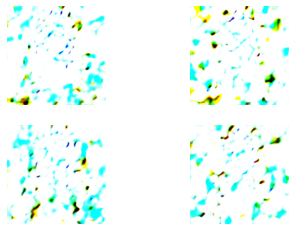

epoch:351 d_loss:0.5455 g_loss:105.9942
epoch:352 d_loss:0.0000 g_loss:66.2887
epoch:353 d_loss:0.4345 g_loss:33.5974
epoch:354 d_loss:0.6071 g_loss:35.0603
epoch:355 d_loss:0.0708 g_loss:54.1882
epoch:356 d_loss:0.1728 g_loss:68.0561
epoch:357 d_loss:0.2812 g_loss:75.5326
epoch:358 d_loss:0.0000 g_loss:81.1661
epoch:359 d_loss:1.3704 g_loss:78.3541
epoch:360 d_loss:0.0192 g_loss:72.4782
epoch:361 d_loss:0.6369 g_loss:63.6780
epoch:362 d_loss:0.2626 g_loss:53.7314
epoch:363 d_loss:0.1679 g_loss:42.6613
epoch:364 d_loss:0.0101 g_loss:32.0888
epoch:365 d_loss:0.5158 g_loss:32.9901
epoch:366 d_loss:0.0607 g_loss:47.5780
epoch:367 d_loss:0.1185 g_loss:58.5490
epoch:368 d_loss:0.0000 g_loss:68.5411
epoch:369 d_loss:0.0358 g_loss:74.1201
epoch:370 d_loss:0.0613 g_loss:75.2407
epoch:371 d_loss:0.1447 g_loss:74.6273
epoch:372 d_loss:0.4444 g_loss:67.3995
epoch:373 d_loss:0.1048 g_loss:59.0180
epoch:374 d_loss:0.5946 g_loss:47.5139
epoch:375 d_loss:0.0034 g_loss:37.7270
epoch:376 d_loss:0.0000 

<Figure size 720x576 with 0 Axes>

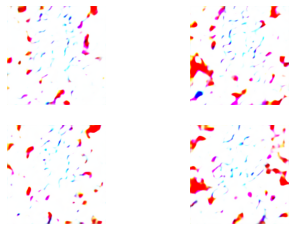

epoch:401 d_loss:0.0939 g_loss:32.5203
epoch:402 d_loss:0.0109 g_loss:25.5980
epoch:403 d_loss:0.6716 g_loss:28.7551
epoch:404 d_loss:0.0000 g_loss:43.1065
epoch:405 d_loss:0.2976 g_loss:53.3885
epoch:406 d_loss:0.1299 g_loss:56.9108
epoch:407 d_loss:0.3349 g_loss:51.8190
epoch:408 d_loss:0.0241 g_loss:45.3439
epoch:409 d_loss:0.2555 g_loss:34.3983
epoch:410 d_loss:0.0842 g_loss:27.6743
epoch:411 d_loss:0.1000 g_loss:27.1461
epoch:412 d_loss:0.0000 g_loss:33.4512
epoch:413 d_loss:0.0023 g_loss:36.8509
epoch:414 d_loss:0.0693 g_loss:36.7988
epoch:415 d_loss:0.0788 g_loss:31.4121
epoch:416 d_loss:0.0039 g_loss:25.8002
epoch:417 d_loss:0.0248 g_loss:22.8307
epoch:418 d_loss:0.0005 g_loss:25.1805
epoch:419 d_loss:0.0001 g_loss:26.4886
epoch:420 d_loss:0.0001 g_loss:27.4538
epoch:421 d_loss:0.0001 g_loss:27.8186
epoch:422 d_loss:0.0000 g_loss:28.5355
epoch:423 d_loss:0.0000 g_loss:28.9675
epoch:424 d_loss:0.0241 g_loss:24.9720
epoch:425 d_loss:0.0140 g_loss:23.5060
epoch:426 d_loss:0.0001 g

<Figure size 720x576 with 0 Axes>

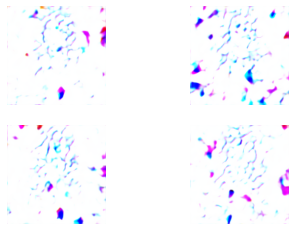

epoch:451 d_loss:0.0090 g_loss:24.2704
epoch:452 d_loss:0.0000 g_loss:26.5674
epoch:453 d_loss:0.0776 g_loss:26.3148
epoch:454 d_loss:0.0495 g_loss:24.5664
epoch:455 d_loss:0.0001 g_loss:24.8082
epoch:456 d_loss:0.0051 g_loss:27.5309
epoch:457 d_loss:0.0379 g_loss:26.8669
epoch:458 d_loss:0.0021 g_loss:26.9223
epoch:459 d_loss:0.0000 g_loss:27.9847
epoch:460 d_loss:0.0001 g_loss:26.9322
epoch:461 d_loss:0.0313 g_loss:21.7546
epoch:462 d_loss:0.0015 g_loss:17.0016
epoch:463 d_loss:0.0241 g_loss:22.1546
epoch:464 d_loss:0.0000 g_loss:34.1679
epoch:465 d_loss:0.0000 g_loss:42.9101
epoch:466 d_loss:0.0651 g_loss:44.4878
epoch:467 d_loss:0.0217 g_loss:39.2177
epoch:468 d_loss:0.1521 g_loss:25.8505
epoch:469 d_loss:0.0202 g_loss:7.8244
epoch:470 d_loss:1.4229 g_loss:185.7918
epoch:471 d_loss:4.9470 g_loss:335.3649
epoch:472 d_loss:19.9751 g_loss:240.4055
epoch:473 d_loss:6.6776 g_loss:151.3394
epoch:474 d_loss:4.3373 g_loss:47.8239
epoch:475 d_loss:11.0038 g_loss:121.3089
epoch:476 d_loss:1.

<Figure size 720x576 with 0 Axes>

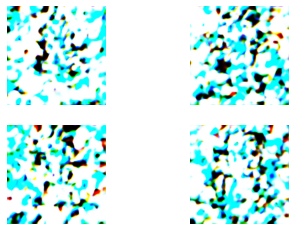

epoch:501 d_loss:0.0000 g_loss:971.9982
epoch:502 d_loss:0.0000 g_loss:1074.4733
epoch:503 d_loss:0.0000 g_loss:1083.0880
epoch:504 d_loss:0.0000 g_loss:990.5287
epoch:505 d_loss:0.0000 g_loss:825.3953
epoch:506 d_loss:0.4939 g_loss:590.6131
epoch:507 d_loss:0.1609 g_loss:361.3350
epoch:508 d_loss:4.1502 g_loss:292.4435
epoch:509 d_loss:0.8485 g_loss:228.8402
epoch:510 d_loss:53.5324 g_loss:639.9848
epoch:511 d_loss:100.9650 g_loss:165.8729
epoch:512 d_loss:0.9683 g_loss:20.0569
epoch:513 d_loss:22.9819 g_loss:323.4364
epoch:514 d_loss:3.3113 g_loss:1048.4382
epoch:515 d_loss:51.4754 g_loss:1069.7520
epoch:516 d_loss:46.8137 g_loss:662.1002
epoch:517 d_loss:15.2691 g_loss:283.5018
epoch:518 d_loss:5.6613 g_loss:26.1011
epoch:519 d_loss:32.4227 g_loss:313.9958
epoch:520 d_loss:7.2121 g_loss:685.1730
epoch:521 d_loss:33.4329 g_loss:740.8904
epoch:522 d_loss:55.3035 g_loss:526.0293
epoch:523 d_loss:19.8553 g_loss:131.9812
epoch:524 d_loss:87.0113 g_loss:237.9981
epoch:525 d_loss:8.4796 g_

<Figure size 720x576 with 0 Axes>

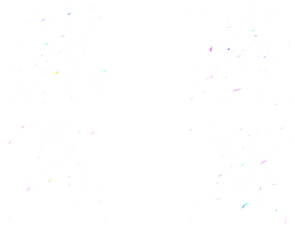

epoch:551 d_loss:1.9397 g_loss:503.1792
epoch:552 d_loss:15.5907 g_loss:717.8918
epoch:553 d_loss:22.6121 g_loss:783.4087
epoch:554 d_loss:40.3381 g_loss:678.3685
epoch:555 d_loss:26.8790 g_loss:484.9767
epoch:556 d_loss:13.4719 g_loss:295.8287
epoch:557 d_loss:4.3739 g_loss:126.1009
epoch:558 d_loss:0.0735 g_loss:0.4089
epoch:559 d_loss:40.0079 g_loss:107.7486
epoch:560 d_loss:0.0348 g_loss:285.6113
epoch:561 d_loss:1.2013 g_loss:393.1162
epoch:562 d_loss:7.8801 g_loss:434.2602
epoch:563 d_loss:8.4159 g_loss:421.0047
epoch:564 d_loss:6.2345 g_loss:360.1040
epoch:565 d_loss:4.7971 g_loss:251.5305
epoch:566 d_loss:6.6799 g_loss:113.0849
epoch:567 d_loss:8.3939 g_loss:105.9476
epoch:568 d_loss:0.7234 g_loss:224.8396
epoch:569 d_loss:1.2420 g_loss:311.8610
epoch:570 d_loss:5.5967 g_loss:317.3087
epoch:571 d_loss:2.6038 g_loss:283.9852
epoch:572 d_loss:3.4209 g_loss:225.4684
epoch:573 d_loss:5.0020 g_loss:130.1654
epoch:574 d_loss:9.4561 g_loss:199.0123
epoch:575 d_loss:3.3954 g_loss:371.3

<Figure size 720x576 with 0 Axes>

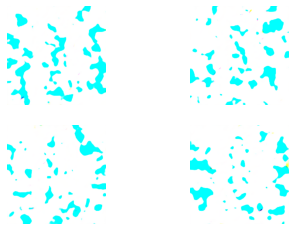

epoch:601 d_loss:1.1181 g_loss:117.6602
epoch:602 d_loss:0.0000 g_loss:106.9406
epoch:603 d_loss:1.4501 g_loss:93.3557
epoch:604 d_loss:0.0000 g_loss:78.3109
epoch:605 d_loss:0.7861 g_loss:57.1058
epoch:606 d_loss:0.1800 g_loss:64.1130
epoch:607 d_loss:1.2261 g_loss:78.5997
epoch:608 d_loss:0.0000 g_loss:89.3298
epoch:609 d_loss:0.3546 g_loss:88.9623
epoch:610 d_loss:0.7323 g_loss:74.9096
epoch:611 d_loss:0.0400 g_loss:52.6901
epoch:612 d_loss:0.0590 g_loss:35.1211
epoch:613 d_loss:0.0036 g_loss:20.3240
epoch:614 d_loss:0.3626 g_loss:74.0471
epoch:615 d_loss:0.3982 g_loss:166.7497
epoch:616 d_loss:0.5637 g_loss:242.1416
epoch:617 d_loss:1.8513 g_loss:288.8644
epoch:618 d_loss:2.5455 g_loss:297.9878
epoch:619 d_loss:0.4410 g_loss:289.2472
epoch:620 d_loss:2.9512 g_loss:252.8122
epoch:621 d_loss:1.5221 g_loss:214.1385
epoch:622 d_loss:0.2321 g_loss:180.2962
epoch:623 d_loss:1.5242 g_loss:137.3714
epoch:624 d_loss:0.0000 g_loss:100.5460
epoch:625 d_loss:0.0002 g_loss:70.7343
epoch:626 d_l

<Figure size 720x576 with 0 Axes>

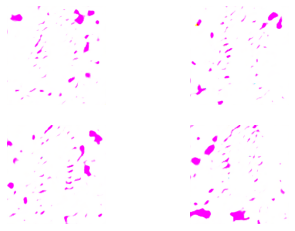

epoch:651 d_loss:0.0000 g_loss:48.5187
epoch:652 d_loss:0.0426 g_loss:51.5925
epoch:653 d_loss:0.0000 g_loss:56.5571
epoch:654 d_loss:0.0332 g_loss:59.9038
epoch:655 d_loss:0.0000 g_loss:62.6880
epoch:656 d_loss:0.2420 g_loss:59.3940
epoch:657 d_loss:0.0000 g_loss:60.0720
epoch:658 d_loss:0.0061 g_loss:60.2692
epoch:659 d_loss:1.6796 g_loss:56.9669
epoch:660 d_loss:0.3437 g_loss:57.9117
epoch:661 d_loss:0.0431 g_loss:62.8042
epoch:662 d_loss:0.0080 g_loss:66.1254
epoch:663 d_loss:0.0174 g_loss:78.4755
epoch:664 d_loss:0.0000 g_loss:92.2855
epoch:665 d_loss:0.0001 g_loss:104.1430
epoch:666 d_loss:0.3391 g_loss:109.3559
epoch:667 d_loss:0.1577 g_loss:103.3899
epoch:668 d_loss:0.0000 g_loss:96.9841
epoch:669 d_loss:0.0000 g_loss:91.0632
epoch:670 d_loss:0.2182 g_loss:86.9128
epoch:671 d_loss:0.4036 g_loss:97.9156
epoch:672 d_loss:0.9212 g_loss:142.3095
epoch:673 d_loss:0.0368 g_loss:202.6362
epoch:674 d_loss:1.5039 g_loss:260.5301
epoch:675 d_loss:3.5333 g_loss:250.1746
epoch:676 d_loss:0

<Figure size 720x576 with 0 Axes>

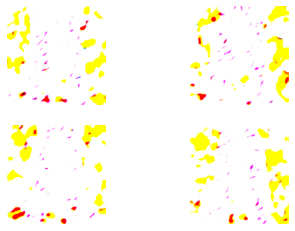

epoch:701 d_loss:0.5646 g_loss:83.3652
epoch:702 d_loss:0.0000 g_loss:57.5636
epoch:703 d_loss:0.6136 g_loss:153.4188
epoch:704 d_loss:0.0000 g_loss:344.7897
epoch:705 d_loss:1.2216 g_loss:446.9364
epoch:706 d_loss:1.7063 g_loss:460.3405
epoch:707 d_loss:1.4405 g_loss:381.4430
epoch:708 d_loss:1.1273 g_loss:272.0090
epoch:709 d_loss:0.5433 g_loss:181.2566
epoch:710 d_loss:0.2502 g_loss:89.5510
epoch:711 d_loss:0.5416 g_loss:13.0524
epoch:712 d_loss:7.8618 g_loss:541.8134
epoch:713 d_loss:2.6588 g_loss:1817.2577
epoch:714 d_loss:148.0792 g_loss:1143.0508
epoch:715 d_loss:30.0224 g_loss:786.0385
epoch:716 d_loss:7.8445 g_loss:522.2764
epoch:717 d_loss:3.4691 g_loss:340.1762
epoch:718 d_loss:2.8823 g_loss:197.0430
epoch:719 d_loss:0.3189 g_loss:92.5486
epoch:720 d_loss:0.0453 g_loss:16.0807
epoch:721 d_loss:8.4827 g_loss:271.1819
epoch:722 d_loss:1.8233 g_loss:771.5086
epoch:723 d_loss:11.4552 g_loss:1144.0587
epoch:724 d_loss:40.3002 g_loss:1200.1436
epoch:725 d_loss:74.3744 g_loss:896.5

<Figure size 720x576 with 0 Axes>

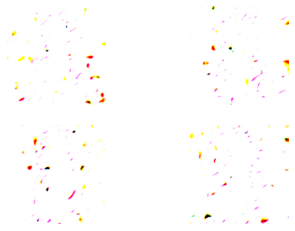

epoch:751 d_loss:4.9765 g_loss:835.8104
epoch:752 d_loss:25.9120 g_loss:1081.5233
epoch:753 d_loss:43.0831 g_loss:1065.9309
epoch:754 d_loss:20.8756 g_loss:936.0524
epoch:755 d_loss:44.5433 g_loss:691.2296
epoch:756 d_loss:7.9470 g_loss:468.5320
epoch:757 d_loss:5.7218 g_loss:278.0656
epoch:758 d_loss:0.0000 g_loss:114.9951
epoch:759 d_loss:1.9073 g_loss:53.1049
epoch:760 d_loss:1.8746 g_loss:99.7583
epoch:761 d_loss:1.0985 g_loss:152.5930
epoch:762 d_loss:0.0080 g_loss:187.2965
epoch:763 d_loss:0.4170 g_loss:204.8666
epoch:764 d_loss:0.9400 g_loss:218.3608
epoch:765 d_loss:0.1327 g_loss:213.4379
epoch:766 d_loss:0.1883 g_loss:206.2667
epoch:767 d_loss:0.3338 g_loss:198.9373
epoch:768 d_loss:1.4368 g_loss:176.4228
epoch:769 d_loss:1.0444 g_loss:147.3505
epoch:770 d_loss:0.0482 g_loss:114.8666
epoch:771 d_loss:0.1267 g_loss:96.4106
epoch:772 d_loss:0.4267 g_loss:104.1590
epoch:773 d_loss:0.1151 g_loss:144.2769
epoch:774 d_loss:0.6061 g_loss:181.9146
epoch:775 d_loss:0.5554 g_loss:203.74

<Figure size 720x576 with 0 Axes>

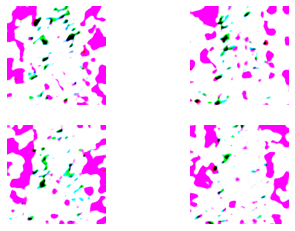

epoch:801 d_loss:0.3731 g_loss:226.4116
epoch:802 d_loss:0.0002 g_loss:273.1359
epoch:803 d_loss:0.7147 g_loss:302.5646
epoch:804 d_loss:0.1502 g_loss:308.1912
epoch:805 d_loss:0.0000 g_loss:309.1476
epoch:806 d_loss:0.0000 g_loss:308.1048
epoch:807 d_loss:0.0000 g_loss:291.3363
epoch:808 d_loss:0.0000 g_loss:284.9889
epoch:809 d_loss:0.0000 g_loss:256.1193
epoch:810 d_loss:0.0020 g_loss:237.9328
epoch:811 d_loss:0.3145 g_loss:258.0266
epoch:812 d_loss:0.1724 g_loss:317.4668
epoch:813 d_loss:0.0000 g_loss:376.0716
epoch:814 d_loss:0.0000 g_loss:412.0120
epoch:815 d_loss:0.0000 g_loss:426.8051
epoch:816 d_loss:0.0000 g_loss:442.1081
epoch:817 d_loss:0.2282 g_loss:428.6371
epoch:818 d_loss:0.0000 g_loss:403.8710
epoch:819 d_loss:0.0000 g_loss:380.4656
epoch:820 d_loss:0.0000 g_loss:340.1000
epoch:821 d_loss:0.2290 g_loss:288.2383
epoch:822 d_loss:0.0000 g_loss:239.9738
epoch:823 d_loss:0.0000 g_loss:177.7254
epoch:824 d_loss:1.2300 g_loss:257.8973
epoch:825 d_loss:0.0000 g_loss:416.3576


<Figure size 720x576 with 0 Axes>

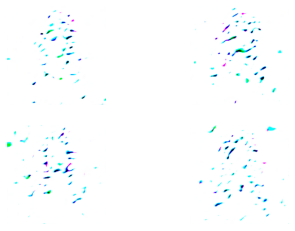

epoch:851 d_loss:6.7588 g_loss:503.0859
epoch:852 d_loss:3.9827 g_loss:382.2060
epoch:853 d_loss:0.3533 g_loss:278.1615
epoch:854 d_loss:0.3785 g_loss:188.2276
epoch:855 d_loss:0.0000 g_loss:120.5939
epoch:856 d_loss:0.0000 g_loss:65.6700
epoch:857 d_loss:0.0219 g_loss:24.0522
epoch:858 d_loss:2.3186 g_loss:107.4672
epoch:859 d_loss:0.6768 g_loss:284.4865
epoch:860 d_loss:0.3256 g_loss:423.1764
epoch:861 d_loss:4.4448 g_loss:504.6413
epoch:862 d_loss:3.8982 g_loss:538.4771
epoch:863 d_loss:3.5218 g_loss:543.1756
epoch:864 d_loss:6.2699 g_loss:513.9957
epoch:865 d_loss:2.1985 g_loss:466.0317
epoch:866 d_loss:2.1551 g_loss:416.1168
epoch:867 d_loss:2.8269 g_loss:362.7592
epoch:868 d_loss:0.8988 g_loss:304.2442
epoch:869 d_loss:2.4074 g_loss:231.2565
epoch:870 d_loss:0.2091 g_loss:166.3781
epoch:871 d_loss:0.0904 g_loss:108.2945
epoch:872 d_loss:0.0000 g_loss:64.1136
epoch:873 d_loss:0.0001 g_loss:27.5097
epoch:874 d_loss:0.6214 g_loss:43.6999
epoch:875 d_loss:0.0000 g_loss:96.7175
epoch:

<Figure size 720x576 with 0 Axes>

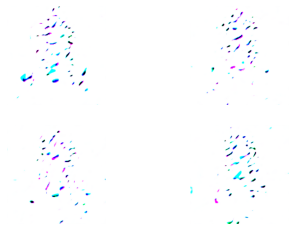

epoch:901 d_loss:0.0000 g_loss:59.1969
epoch:902 d_loss:0.0000 g_loss:53.0415
epoch:903 d_loss:0.0000 g_loss:49.0477
epoch:904 d_loss:0.0000 g_loss:46.7880
epoch:905 d_loss:0.0000 g_loss:42.9075
epoch:906 d_loss:0.0000 g_loss:38.2218
epoch:907 d_loss:0.0000 g_loss:36.5522
epoch:908 d_loss:0.0000 g_loss:33.6648
epoch:909 d_loss:0.0154 g_loss:34.0797
epoch:910 d_loss:0.0026 g_loss:40.9294
epoch:911 d_loss:0.0000 g_loss:41.9811
epoch:912 d_loss:0.0000 g_loss:45.3810
epoch:913 d_loss:0.0000 g_loss:49.9834
epoch:914 d_loss:0.0000 g_loss:50.4314
epoch:915 d_loss:0.0000 g_loss:50.0855
epoch:916 d_loss:0.0000 g_loss:53.5649
epoch:917 d_loss:0.0000 g_loss:51.1823
epoch:918 d_loss:0.0000 g_loss:51.7601
epoch:919 d_loss:0.0000 g_loss:52.8659
epoch:920 d_loss:0.0000 g_loss:55.2711
epoch:921 d_loss:0.0000 g_loss:53.1308
epoch:922 d_loss:0.0000 g_loss:49.6611
epoch:923 d_loss:0.0000 g_loss:51.9355
epoch:924 d_loss:0.0000 g_loss:50.9787
epoch:925 d_loss:0.0000 g_loss:51.7665
epoch:926 d_loss:0.0000 g

<Figure size 720x576 with 0 Axes>

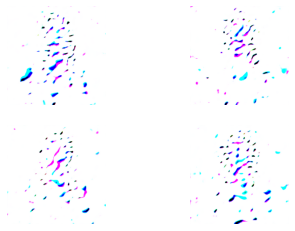

epoch:951 d_loss:0.0000 g_loss:69.2657
epoch:952 d_loss:0.0000 g_loss:73.7907
epoch:953 d_loss:0.2053 g_loss:73.9660
epoch:954 d_loss:0.0000 g_loss:74.2589
epoch:955 d_loss:0.0000 g_loss:70.8966
epoch:956 d_loss:0.0000 g_loss:72.8904
epoch:957 d_loss:0.0000 g_loss:70.4029
epoch:958 d_loss:0.0000 g_loss:68.3612
epoch:959 d_loss:0.0000 g_loss:66.9385
epoch:960 d_loss:0.4045 g_loss:61.1835
epoch:961 d_loss:0.0000 g_loss:56.8235
epoch:962 d_loss:0.0000 g_loss:52.8174
epoch:963 d_loss:0.0043 g_loss:49.6707
epoch:964 d_loss:0.0000 g_loss:52.5088
epoch:965 d_loss:0.0000 g_loss:49.6763
epoch:966 d_loss:0.0007 g_loss:47.8015
epoch:967 d_loss:0.0007 g_loss:50.8059
epoch:968 d_loss:0.0000 g_loss:48.6181
epoch:969 d_loss:0.1197 g_loss:45.8072
epoch:970 d_loss:0.1341 g_loss:41.1120
epoch:971 d_loss:0.0231 g_loss:50.7695
epoch:972 d_loss:0.0000 g_loss:60.2645
epoch:973 d_loss:0.1530 g_loss:58.9149
epoch:974 d_loss:0.0000 g_loss:61.5984
epoch:975 d_loss:0.0024 g_loss:63.6697
epoch:976 d_loss:0.0000 g

<Figure size 720x576 with 0 Axes>

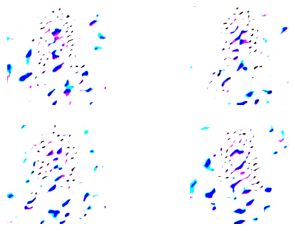

epoch:1001 d_loss:0.0066 g_loss:38.5251
epoch:1002 d_loss:0.0360 g_loss:57.1941
epoch:1003 d_loss:0.0000 g_loss:81.2041
epoch:1004 d_loss:0.0000 g_loss:97.9530
epoch:1005 d_loss:0.0000 g_loss:109.5580
epoch:1006 d_loss:0.0009 g_loss:119.8976
epoch:1007 d_loss:0.0000 g_loss:128.9042
epoch:1008 d_loss:0.1496 g_loss:123.4094
epoch:1009 d_loss:0.0000 g_loss:120.8270
epoch:1010 d_loss:0.0033 g_loss:116.4173
epoch:1011 d_loss:0.0000 g_loss:109.1716
epoch:1012 d_loss:0.0000 g_loss:107.2867
epoch:1013 d_loss:0.0000 g_loss:102.0052
epoch:1014 d_loss:0.0000 g_loss:97.2952
epoch:1015 d_loss:0.0000 g_loss:92.8185
epoch:1016 d_loss:0.0000 g_loss:90.8048
epoch:1017 d_loss:0.0000 g_loss:91.2914
epoch:1018 d_loss:0.1914 g_loss:78.0823
epoch:1019 d_loss:0.0000 g_loss:70.0222
epoch:1020 d_loss:0.0000 g_loss:61.6192
epoch:1021 d_loss:0.0000 g_loss:55.0576
epoch:1022 d_loss:0.0000 g_loss:47.5537
epoch:1023 d_loss:0.0000 g_loss:43.0680
epoch:1024 d_loss:0.0000 g_loss:38.9942
epoch:1025 d_loss:0.0003 g_loss

<Figure size 720x576 with 0 Axes>

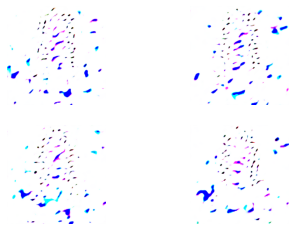

epoch:1051 d_loss:0.0000 g_loss:63.3842
epoch:1052 d_loss:0.0000 g_loss:67.0556
epoch:1053 d_loss:0.0000 g_loss:68.5902
epoch:1054 d_loss:0.0000 g_loss:72.2966
epoch:1055 d_loss:0.0000 g_loss:74.4901
epoch:1056 d_loss:0.0000 g_loss:71.7006
epoch:1057 d_loss:0.0000 g_loss:74.3706
epoch:1058 d_loss:0.0000 g_loss:73.7149
epoch:1059 d_loss:0.0000 g_loss:74.5694
epoch:1060 d_loss:0.0000 g_loss:74.0386
epoch:1061 d_loss:0.0000 g_loss:73.4027
epoch:1062 d_loss:0.0000 g_loss:73.3505
epoch:1063 d_loss:0.0000 g_loss:74.4458
epoch:1064 d_loss:0.0000 g_loss:74.0462
epoch:1065 d_loss:0.0000 g_loss:73.9682
epoch:1066 d_loss:0.0000 g_loss:74.1559
epoch:1067 d_loss:0.0000 g_loss:72.9408
epoch:1068 d_loss:0.0000 g_loss:73.2558
epoch:1069 d_loss:0.0260 g_loss:62.6413
epoch:1070 d_loss:0.0000 g_loss:52.2702
epoch:1071 d_loss:0.0000 g_loss:43.3493
epoch:1072 d_loss:0.0012 g_loss:38.5365
epoch:1073 d_loss:0.0004 g_loss:37.2278
epoch:1074 d_loss:0.0000 g_loss:34.3012
epoch:1075 d_loss:0.0000 g_loss:33.2443


<Figure size 720x576 with 0 Axes>

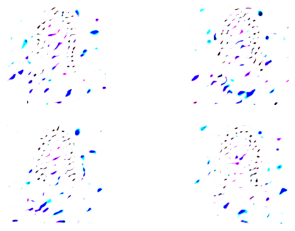

epoch:1101 d_loss:0.0000 g_loss:43.1433
epoch:1102 d_loss:0.0000 g_loss:40.6782
epoch:1103 d_loss:0.0099 g_loss:47.7808
epoch:1104 d_loss:0.0000 g_loss:61.5715
epoch:1105 d_loss:0.0000 g_loss:71.6098
epoch:1106 d_loss:0.0000 g_loss:77.6703
epoch:1107 d_loss:0.0000 g_loss:85.1804
epoch:1108 d_loss:0.0000 g_loss:87.5106
epoch:1109 d_loss:0.0000 g_loss:93.4380
epoch:1110 d_loss:0.0000 g_loss:96.2988
epoch:1111 d_loss:0.0000 g_loss:96.4506
epoch:1112 d_loss:0.2332 g_loss:78.4620
epoch:1113 d_loss:0.0000 g_loss:60.2379
epoch:1114 d_loss:0.0000 g_loss:47.4204
epoch:1115 d_loss:0.0000 g_loss:32.4057
epoch:1116 d_loss:0.0268 g_loss:45.8668
epoch:1117 d_loss:0.0000 g_loss:71.9511
epoch:1118 d_loss:0.0000 g_loss:91.5144
epoch:1119 d_loss:0.0000 g_loss:106.7294
epoch:1120 d_loss:0.0001 g_loss:118.8970
epoch:1121 d_loss:0.1331 g_loss:106.3706
epoch:1122 d_loss:0.1339 g_loss:88.0334
epoch:1123 d_loss:0.0000 g_loss:69.4158
epoch:1124 d_loss:0.0000 g_loss:53.0628
epoch:1125 d_loss:0.0000 g_loss:39.31

<Figure size 720x576 with 0 Axes>

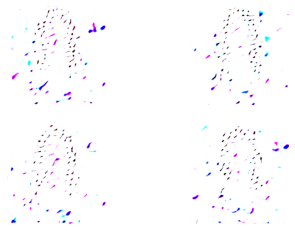

epoch:1151 d_loss:0.0000 g_loss:51.5716
epoch:1152 d_loss:0.0000 g_loss:50.9379
epoch:1153 d_loss:0.0000 g_loss:50.2743
epoch:1154 d_loss:0.0000 g_loss:50.0188
epoch:1155 d_loss:0.0000 g_loss:48.1553
epoch:1156 d_loss:0.0000 g_loss:48.3592
epoch:1157 d_loss:0.0000 g_loss:45.0098
epoch:1158 d_loss:0.0000 g_loss:44.2833
epoch:1159 d_loss:0.0000 g_loss:45.8741
epoch:1160 d_loss:0.0000 g_loss:44.9132
epoch:1161 d_loss:0.0011 g_loss:43.3706
epoch:1162 d_loss:0.0000 g_loss:45.6464
epoch:1163 d_loss:0.0000 g_loss:49.5045
epoch:1164 d_loss:0.0000 g_loss:49.0768
epoch:1165 d_loss:0.0000 g_loss:50.7156
epoch:1166 d_loss:0.0000 g_loss:50.8511
epoch:1167 d_loss:0.0000 g_loss:50.2151
epoch:1168 d_loss:0.0000 g_loss:51.7525
epoch:1169 d_loss:0.0000 g_loss:50.1351
epoch:1170 d_loss:0.0000 g_loss:49.6888
epoch:1171 d_loss:0.0000 g_loss:50.2166
epoch:1172 d_loss:0.0000 g_loss:48.9313
epoch:1173 d_loss:0.0000 g_loss:48.1634
epoch:1174 d_loss:0.0000 g_loss:47.6871
epoch:1175 d_loss:0.0000 g_loss:48.6687


<Figure size 720x576 with 0 Axes>

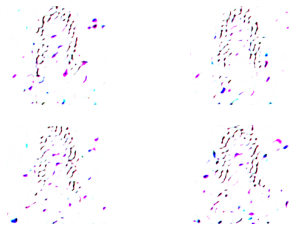

epoch:1201 d_loss:0.0084 g_loss:18.5103
epoch:1202 d_loss:0.2263 g_loss:85.4169
epoch:1203 d_loss:0.0723 g_loss:166.9538
epoch:1204 d_loss:0.9659 g_loss:209.4662
epoch:1205 d_loss:3.0012 g_loss:164.1308
epoch:1206 d_loss:0.0057 g_loss:132.0704
epoch:1207 d_loss:0.1192 g_loss:92.9173
epoch:1208 d_loss:0.0000 g_loss:62.7065
epoch:1209 d_loss:0.0000 g_loss:33.7726
epoch:1210 d_loss:0.2081 g_loss:51.0742
epoch:1211 d_loss:0.0000 g_loss:97.5743
epoch:1212 d_loss:0.0000 g_loss:125.9615
epoch:1213 d_loss:0.1453 g_loss:148.6801
epoch:1214 d_loss:0.0000 g_loss:163.7587
epoch:1215 d_loss:0.0040 g_loss:173.0741
epoch:1216 d_loss:0.0371 g_loss:174.6122
epoch:1217 d_loss:1.6970 g_loss:159.2482
epoch:1218 d_loss:0.1007 g_loss:135.9426
epoch:1219 d_loss:0.3291 g_loss:113.9055
epoch:1220 d_loss:0.0000 g_loss:88.4946
epoch:1221 d_loss:0.0000 g_loss:69.6379
epoch:1222 d_loss:0.0000 g_loss:47.7029
epoch:1223 d_loss:0.0000 g_loss:29.6047
epoch:1224 d_loss:0.1834 g_loss:37.7194
epoch:1225 d_loss:0.0000 g_l

<Figure size 720x576 with 0 Axes>

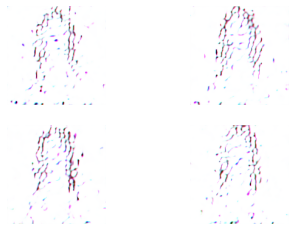

epoch:1251 d_loss:0.0697 g_loss:32.7749
epoch:1252 d_loss:0.0000 g_loss:33.2905
epoch:1253 d_loss:0.0347 g_loss:50.5856
epoch:1254 d_loss:0.0011 g_loss:76.6380
epoch:1255 d_loss:0.0000 g_loss:100.4271
epoch:1256 d_loss:0.2409 g_loss:98.5912
epoch:1257 d_loss:0.3860 g_loss:76.8106
epoch:1258 d_loss:0.0000 g_loss:53.2538
epoch:1259 d_loss:0.6795 g_loss:34.3419
epoch:1260 d_loss:0.0703 g_loss:42.6286
epoch:1261 d_loss:0.0913 g_loss:48.2223
epoch:1262 d_loss:0.0790 g_loss:65.0503
epoch:1263 d_loss:0.5030 g_loss:39.9090
epoch:1264 d_loss:1.3534 g_loss:156.3223
epoch:1265 d_loss:0.6030 g_loss:405.2162
epoch:1266 d_loss:6.6348 g_loss:240.9044
epoch:1267 d_loss:0.4927 g_loss:148.0245
epoch:1268 d_loss:0.4254 g_loss:72.2554
epoch:1269 d_loss:2.0955 g_loss:49.1806
epoch:1270 d_loss:0.4609 g_loss:106.4581
epoch:1271 d_loss:0.3664 g_loss:162.0043
epoch:1272 d_loss:0.0000 g_loss:211.8787
epoch:1273 d_loss:2.5616 g_loss:118.3113
epoch:1274 d_loss:0.8101 g_loss:36.6261
epoch:1275 d_loss:3.8205 g_loss

<Figure size 720x576 with 0 Axes>

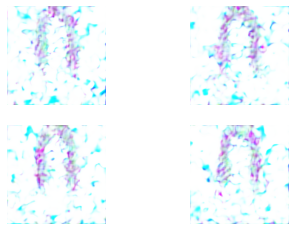

epoch:1301 d_loss:145.8804 g_loss:219.8345
epoch:1302 d_loss:10.2839 g_loss:839.6328
epoch:1303 d_loss:183.6058 g_loss:599.3813
epoch:1304 d_loss:143.1423 g_loss:931.4501
epoch:1305 d_loss:97.3266 g_loss:1579.3048
epoch:1306 d_loss:40.9817 g_loss:1930.1172
epoch:1307 d_loss:3.6102 g_loss:1656.3661
epoch:1308 d_loss:1.8124 g_loss:719.6107
epoch:1309 d_loss:201.8197 g_loss:789.6747
epoch:1310 d_loss:0.0000 g_loss:1485.0079
epoch:1311 d_loss:2.2739 g_loss:1802.3311
epoch:1312 d_loss:56.9801 g_loss:929.1500
epoch:1313 d_loss:104.1009 g_loss:489.2005
epoch:1314 d_loss:44.6661 g_loss:1045.0846
epoch:1315 d_loss:32.9147 g_loss:1616.3534
epoch:1316 d_loss:16.4154 g_loss:1839.0725
epoch:1317 d_loss:3.1476 g_loss:1675.6395
epoch:1318 d_loss:0.0653 g_loss:1333.5396
epoch:1319 d_loss:1.2614 g_loss:703.4645
epoch:1320 d_loss:6.1019 g_loss:658.3708
epoch:1321 d_loss:1.6406 g_loss:1514.8879
epoch:1322 d_loss:16.2040 g_loss:1984.2086
epoch:1323 d_loss:33.5758 g_loss:511.1396
epoch:1324 d_loss:13.6895 

<Figure size 720x576 with 0 Axes>

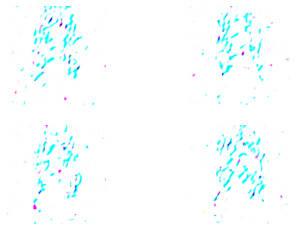

epoch:1351 d_loss:28.3672 g_loss:1182.4513
epoch:1352 d_loss:36.5900 g_loss:997.7448
epoch:1353 d_loss:19.1121 g_loss:685.5399
epoch:1354 d_loss:4.2276 g_loss:361.8280
epoch:1355 d_loss:2.2927 g_loss:71.0612
epoch:1356 d_loss:14.3358 g_loss:257.6618
epoch:1357 d_loss:0.6125 g_loss:804.5516
epoch:1358 d_loss:7.9881 g_loss:1187.0419
epoch:1359 d_loss:47.8567 g_loss:1261.0562
epoch:1360 d_loss:25.3631 g_loss:1151.3832
epoch:1361 d_loss:9.1043 g_loss:993.4880
epoch:1362 d_loss:16.8487 g_loss:748.9888
epoch:1363 d_loss:9.9305 g_loss:474.3953
epoch:1364 d_loss:0.0000 g_loss:274.0389
epoch:1365 d_loss:0.5376 g_loss:96.7693
epoch:1366 d_loss:0.0208 g_loss:2.3761
epoch:1367 d_loss:27.3935 g_loss:272.9280
epoch:1368 d_loss:1.2083 g_loss:896.8053
epoch:1369 d_loss:6.7762 g_loss:1386.3384
epoch:1370 d_loss:36.8439 g_loss:1607.3157
epoch:1371 d_loss:50.2599 g_loss:1549.2150
epoch:1372 d_loss:62.3200 g_loss:1263.9574
epoch:1373 d_loss:22.1440 g_loss:949.5225
epoch:1374 d_loss:15.1120 g_loss:635.6326

<Figure size 720x576 with 0 Axes>

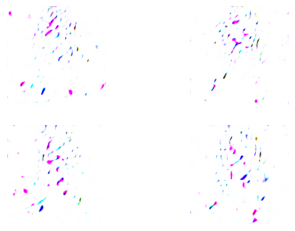

epoch:1401 d_loss:0.2215 g_loss:178.1821
epoch:1402 d_loss:0.0000 g_loss:193.2267
epoch:1403 d_loss:0.0000 g_loss:206.7526
epoch:1404 d_loss:0.0000 g_loss:210.4478
epoch:1405 d_loss:0.0552 g_loss:203.3493
epoch:1406 d_loss:0.0000 g_loss:192.3638
epoch:1407 d_loss:1.3076 g_loss:187.4400
epoch:1408 d_loss:0.3366 g_loss:165.8430
epoch:1409 d_loss:0.3189 g_loss:142.0404
epoch:1410 d_loss:0.1889 g_loss:128.2212
epoch:1411 d_loss:0.0544 g_loss:113.6042
epoch:1412 d_loss:0.0031 g_loss:107.0740
epoch:1413 d_loss:0.4940 g_loss:103.3043
epoch:1414 d_loss:0.1076 g_loss:104.7445
epoch:1415 d_loss:0.7195 g_loss:119.4305
epoch:1416 d_loss:0.0793 g_loss:138.0227
epoch:1417 d_loss:0.3853 g_loss:171.5153
epoch:1418 d_loss:0.0000 g_loss:189.5772
epoch:1419 d_loss:1.5674 g_loss:203.5039
epoch:1420 d_loss:0.2037 g_loss:199.0032
epoch:1421 d_loss:0.0000 g_loss:194.1355
epoch:1422 d_loss:1.4187 g_loss:167.1414
epoch:1423 d_loss:0.6775 g_loss:148.1210
epoch:1424 d_loss:1.6796 g_loss:169.5634
epoch:1425 d_los

<Figure size 720x576 with 0 Axes>

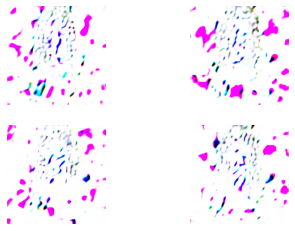

epoch:1451 d_loss:0.1182 g_loss:168.7800
epoch:1452 d_loss:0.0000 g_loss:196.1532
epoch:1453 d_loss:0.0000 g_loss:218.7475
epoch:1454 d_loss:0.0000 g_loss:225.2904
epoch:1455 d_loss:0.5102 g_loss:223.6648
epoch:1456 d_loss:0.0623 g_loss:212.5280
epoch:1457 d_loss:0.0000 g_loss:191.1426
epoch:1458 d_loss:0.0000 g_loss:174.8193
epoch:1459 d_loss:0.0000 g_loss:142.4883
epoch:1460 d_loss:0.7149 g_loss:125.3536
epoch:1461 d_loss:0.0000 g_loss:107.9349
epoch:1462 d_loss:0.3110 g_loss:113.2149
epoch:1463 d_loss:0.2195 g_loss:136.4651
epoch:1464 d_loss:0.9002 g_loss:149.2920
epoch:1465 d_loss:0.1718 g_loss:158.3066
epoch:1466 d_loss:0.3473 g_loss:163.7753
epoch:1467 d_loss:1.6912 g_loss:146.9585
epoch:1468 d_loss:2.7414 g_loss:129.9527
epoch:1469 d_loss:6.9171 g_loss:73.7278
epoch:1470 d_loss:0.5126 g_loss:271.9558
epoch:1471 d_loss:0.1494 g_loss:337.8120
epoch:1472 d_loss:6.2294 g_loss:233.7120
epoch:1473 d_loss:7.4037 g_loss:181.8551
epoch:1474 d_loss:13.8934 g_loss:221.1413
epoch:1475 d_los

<Figure size 720x576 with 0 Axes>

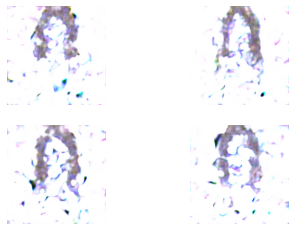

epoch:1501 d_loss:19.7492 g_loss:39.0965
epoch:1502 d_loss:43.4959 g_loss:90.8583
epoch:1503 d_loss:15.7296 g_loss:445.6597
epoch:1504 d_loss:38.1821 g_loss:318.0234
epoch:1505 d_loss:37.2307 g_loss:5.5192
epoch:1506 d_loss:1.9160 g_loss:0.0000
epoch:1507 d_loss:60.2755 g_loss:339.7726
epoch:1508 d_loss:1.4683 g_loss:777.8070
epoch:1509 d_loss:69.7367 g_loss:713.6199
epoch:1510 d_loss:120.7493 g_loss:447.1184
epoch:1511 d_loss:37.8854 g_loss:0.0000
epoch:1512 d_loss:202.7030 g_loss:296.2484
epoch:1513 d_loss:1.1844 g_loss:758.3013
epoch:1514 d_loss:24.5882 g_loss:723.5209
epoch:1515 d_loss:55.1534 g_loss:417.7127
epoch:1516 d_loss:42.8197 g_loss:531.7822
epoch:1517 d_loss:14.2798 g_loss:311.2476
epoch:1518 d_loss:73.4906 g_loss:126.3003
epoch:1519 d_loss:0.2154 g_loss:294.0302
epoch:1520 d_loss:13.9947 g_loss:397.6541
epoch:1521 d_loss:19.2116 g_loss:412.2208
epoch:1522 d_loss:29.9311 g_loss:448.2363
epoch:1523 d_loss:7.5978 g_loss:287.6054
epoch:1524 d_loss:0.2607 g_loss:0.7340
epoch:

<Figure size 720x576 with 0 Axes>

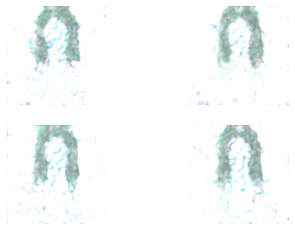

epoch:1551 d_loss:3.9764 g_loss:15.5067
epoch:1552 d_loss:1.8863 g_loss:5.7525
epoch:1553 d_loss:0.3311 g_loss:6.0064
epoch:1554 d_loss:0.0002 g_loss:7.5342
epoch:1555 d_loss:0.0000 g_loss:5.6881
epoch:1556 d_loss:0.0001 g_loss:3.9382
epoch:1557 d_loss:0.0000 g_loss:2.3747
epoch:1558 d_loss:0.4574 g_loss:4.1020
epoch:1559 d_loss:0.4139 g_loss:2.9286
epoch:1560 d_loss:0.0001 g_loss:11.6032
epoch:1561 d_loss:0.0845 g_loss:19.1403
epoch:1562 d_loss:0.5954 g_loss:27.9599
epoch:1563 d_loss:0.1229 g_loss:24.2923
epoch:1564 d_loss:1.1040 g_loss:11.2517
epoch:1565 d_loss:0.1675 g_loss:8.9400
epoch:1566 d_loss:1.4360 g_loss:29.8533
epoch:1567 d_loss:1.5032 g_loss:84.1036
epoch:1568 d_loss:0.2079 g_loss:111.9391
epoch:1569 d_loss:2.8943 g_loss:77.9566
epoch:1570 d_loss:1.6550 g_loss:32.4814
epoch:1571 d_loss:1.7716 g_loss:17.1658
epoch:1572 d_loss:1.8000 g_loss:64.5665
epoch:1573 d_loss:0.9056 g_loss:150.7277
epoch:1574 d_loss:1.6600 g_loss:155.8006
epoch:1575 d_loss:1.6515 g_loss:99.6411
epoch:

<Figure size 720x576 with 0 Axes>

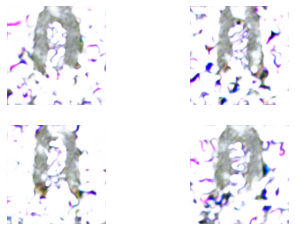

epoch:1601 d_loss:36.6905 g_loss:63.2085
epoch:1602 d_loss:1.0495 g_loss:256.3612
epoch:1603 d_loss:13.9929 g_loss:330.1504
epoch:1604 d_loss:21.9399 g_loss:261.6927
epoch:1605 d_loss:8.6152 g_loss:143.3494
epoch:1606 d_loss:2.1955 g_loss:48.7312
epoch:1607 d_loss:10.1429 g_loss:64.6000
epoch:1608 d_loss:1.9102 g_loss:133.5882
epoch:1609 d_loss:0.9792 g_loss:167.5803
epoch:1610 d_loss:6.0898 g_loss:150.8265
epoch:1611 d_loss:3.8458 g_loss:103.9945
epoch:1612 d_loss:1.1553 g_loss:62.4802
epoch:1613 d_loss:6.7453 g_loss:68.2094
epoch:1614 d_loss:2.6328 g_loss:116.6742
epoch:1615 d_loss:2.9795 g_loss:116.6634
epoch:1616 d_loss:7.0913 g_loss:84.2243
epoch:1617 d_loss:5.9841 g_loss:72.6661
epoch:1618 d_loss:8.5349 g_loss:100.4031
epoch:1619 d_loss:4.0412 g_loss:148.1666
epoch:1620 d_loss:8.7678 g_loss:142.9863
epoch:1621 d_loss:7.6974 g_loss:74.7079
epoch:1622 d_loss:9.3912 g_loss:93.4374
epoch:1623 d_loss:2.1844 g_loss:171.6633
epoch:1624 d_loss:3.5198 g_loss:187.7115
epoch:1625 d_loss:4.1

<Figure size 720x576 with 0 Axes>

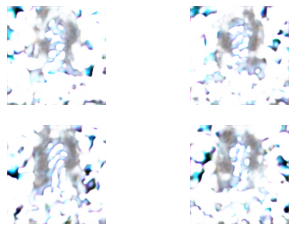

epoch:1651 d_loss:2.2364 g_loss:110.0601
epoch:1652 d_loss:1.3943 g_loss:84.6119
epoch:1653 d_loss:3.0100 g_loss:64.5033
epoch:1654 d_loss:0.5970 g_loss:95.5458
epoch:1655 d_loss:1.3529 g_loss:86.6155
epoch:1656 d_loss:1.3923 g_loss:78.4822
epoch:1657 d_loss:0.7682 g_loss:55.8371
epoch:1658 d_loss:1.1785 g_loss:59.8641
epoch:1659 d_loss:0.5283 g_loss:79.1699
epoch:1660 d_loss:0.4970 g_loss:72.0625
epoch:1661 d_loss:0.1541 g_loss:42.6393
epoch:1662 d_loss:0.5755 g_loss:58.8472
epoch:1663 d_loss:0.3720 g_loss:101.2458
epoch:1664 d_loss:2.9194 g_loss:85.0288
epoch:1665 d_loss:0.3373 g_loss:68.3847
epoch:1666 d_loss:1.6858 g_loss:50.8110
epoch:1667 d_loss:2.9432 g_loss:102.7237
epoch:1668 d_loss:1.6967 g_loss:154.8199
epoch:1669 d_loss:3.3663 g_loss:141.7828
epoch:1670 d_loss:3.3769 g_loss:56.7610
epoch:1671 d_loss:7.6401 g_loss:173.4422
epoch:1672 d_loss:3.2541 g_loss:384.1133
epoch:1673 d_loss:31.7252 g_loss:274.9449
epoch:1674 d_loss:16.4948 g_loss:41.2575
epoch:1675 d_loss:40.9247 g_lo

<Figure size 720x576 with 0 Axes>

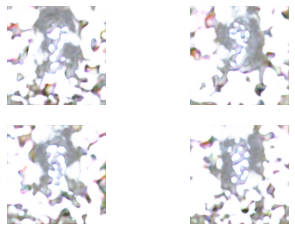

epoch:1701 d_loss:6.8254 g_loss:79.5337
epoch:1702 d_loss:8.9750 g_loss:35.6448
epoch:1703 d_loss:6.7427 g_loss:102.8333
epoch:1704 d_loss:6.1922 g_loss:145.8386
epoch:1705 d_loss:12.0564 g_loss:62.9000
epoch:1706 d_loss:8.1255 g_loss:76.6732
epoch:1707 d_loss:5.4785 g_loss:117.4227
epoch:1708 d_loss:7.0163 g_loss:71.9331
epoch:1709 d_loss:6.0602 g_loss:43.6963
epoch:1710 d_loss:4.6525 g_loss:79.0599
epoch:1711 d_loss:6.0379 g_loss:73.4408
epoch:1712 d_loss:6.0417 g_loss:35.3856
epoch:1713 d_loss:8.0991 g_loss:101.4120
epoch:1714 d_loss:4.1508 g_loss:188.4202
epoch:1715 d_loss:12.4054 g_loss:100.7128
epoch:1716 d_loss:4.3231 g_loss:25.8019
epoch:1717 d_loss:4.1794 g_loss:66.0384
epoch:1718 d_loss:2.0107 g_loss:101.3396
epoch:1719 d_loss:7.5439 g_loss:37.5094
epoch:1720 d_loss:12.4283 g_loss:98.5445
epoch:1721 d_loss:5.8384 g_loss:201.5192
epoch:1722 d_loss:18.8076 g_loss:86.6293
epoch:1723 d_loss:9.2348 g_loss:27.0402
epoch:1724 d_loss:2.2718 g_loss:59.7128
epoch:1725 d_loss:2.0877 g_l

<Figure size 720x576 with 0 Axes>

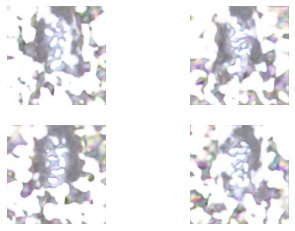

epoch:1751 d_loss:2.8663 g_loss:86.6477
epoch:1752 d_loss:4.6376 g_loss:54.8435
epoch:1753 d_loss:1.2424 g_loss:42.6898
epoch:1754 d_loss:1.5040 g_loss:53.2120
epoch:1755 d_loss:1.3173 g_loss:96.3235
epoch:1756 d_loss:3.0128 g_loss:91.6454
epoch:1757 d_loss:2.6751 g_loss:56.3317
epoch:1758 d_loss:2.7442 g_loss:36.8430
epoch:1759 d_loss:0.1724 g_loss:47.8811
epoch:1760 d_loss:2.0489 g_loss:44.6923
epoch:1761 d_loss:0.0271 g_loss:63.5124
epoch:1762 d_loss:0.4319 g_loss:59.5341
epoch:1763 d_loss:0.9921 g_loss:29.4245
epoch:1764 d_loss:2.1014 g_loss:50.4158
epoch:1765 d_loss:1.0578 g_loss:92.7309
epoch:1766 d_loss:5.1414 g_loss:39.1673
epoch:1767 d_loss:5.2977 g_loss:71.2581
epoch:1768 d_loss:1.5479 g_loss:158.7826
epoch:1769 d_loss:10.7477 g_loss:73.7075
epoch:1770 d_loss:2.4840 g_loss:14.2067
epoch:1771 d_loss:6.8257 g_loss:82.6525
epoch:1772 d_loss:2.3899 g_loss:198.8897
epoch:1773 d_loss:21.0028 g_loss:130.3754
epoch:1774 d_loss:7.4045 g_loss:35.4385


KeyboardInterrupt: ignored

In [91]:
def gan_train(epoch, batch_size, saving_interval):
    
    #X_train = X_train.reshape(X_train.shape[0], 256, 256, 1).astype('float32')
    #X_train = (X_train - 127.5)/ 127.5
    true = np.ones((batch_size, 1))
    fake = np.zeros((batch_size, 1))
    
    for i in range(epoch):
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        imgs = X_train[idx]
        d_loss_real = discriminator.train_on_batch(imgs, true)
        
        noise = np.random.normal(0, 1, (batch_size, 100))
        gen_imgs = generator.predict(noise)
        d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
        
        d_loss = 0.5*np.add(d_loss_real, d_loss_fake)
        g_loss = gan.train_on_batch(noise, true)
        
        print('epoch:%d' % i, 'd_loss:%.4f' % d_loss, 'g_loss:%.4f' % g_loss)
        
        if i % saving_interval == 0:
            noise = np.random.normal(0, 1, (25, 100))
            gen_imgs = generator.predict(noise)
            
            gen_imgs = 0.5 * gen_imgs + 0.5
            plt.figure(figsize=(10,8))
            fig, axs = plt.subplots(2, 2)
            count = 0
            for j in range(2):
                for k in range(2):
                    axs[j, k].imshow(gen_imgs[count, :, :, :], cmap='gray')
                    axs[j, k].axis('off')
                    count += 1
                    fig.savefig('./drive/MyDrive/astest/arterm_sapience_%d.png' % i )
            plt.show()
                    
gan_train(10001, 100, 50)